In [26]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt

In [27]:
with open ('../tracker_stubs/ball_detections.pkl', 'rb') as f:
    ball_positions = pickle.load(f)

In [28]:
ball_positions

[{},
 {1: [892.924560546875, 616.61474609375, 911.2674560546875, 636.578369140625]},
 {},
 {},
 {},
 {},
 {1: [821.7299194335938,
   687.690185546875,
   837.8069458007812,
   705.2015991210938]},
 {1: [813.6368408203125, 695.0394897460938, 830.912109375, 715.6110229492188]},
 {1: [796.6184692382812,
   718.6104125976562,
   814.9916381835938,
   739.1336059570312]},
 {1: [777.5864868164062,
   742.3187255859375,
   798.727294921875,
   765.6536865234375]},
 {1: [772.4910278320312,
   759.58935546875,
   787.7843627929688,
   776.325927734375]},
 {1: [777.4194946289062,
   718.279541015625,
   796.1995239257812,
   739.2255249023438]},
 {},
 {1: [795.324462890625, 646.8731689453125, 813.17578125, 667.3270263671875]},
 {1: [802.6322021484375, 607.5947265625, 821.93408203125, 628.343505859375]},
 {1: [815.225830078125,
   569.2003784179688,
   831.3424072265625,
   587.1447143554688]},
 {1: [819.1184692382812,
   550.7830810546875,
   837.3901977539062,
   571.10009765625]},
 {1: [826.09

In [29]:
ball_positions = [x.get(1,[]) for x in ball_positions]
# convert the list into pandas dataframe
df_ball_positions = pd.DataFrame(ball_positions,columns=['x1','y1','x2','y2'])

# interpolate the missing values
df_ball_positions = df_ball_positions.interpolate()
df_ball_positions = df_ball_positions.bfill()

#ball_positions = [{1:x} for x in df_ball_positions.to_numpy().tolist()]

In [30]:
df_ball_positions.head()

,x1,y1,x2,y2
0,892.924561,616.614746,911.267456,636.578369
1,892.924561,616.614746,911.267456,636.578369
2,878.685632,630.829834,896.575354,650.303015
3,864.446704,645.044922,881.883252,664.027661
4,850.207776,659.260010,867.191150,677.752307


In [31]:
df_ball_positions['mid_y'] = (df_ball_positions['y1'] + df_ball_positions['y2'])/2
df_ball_positions.head()

,x1,y1,x2,y2,mid_y
0,892.924561,616.614746,911.267456,636.578369,626.596558
1,892.924561,616.614746,911.267456,636.578369,626.596558
2,878.685632,630.829834,896.575354,650.303015,640.566425
3,864.446704,645.044922,881.883252,664.027661,654.536292
4,850.207776,659.260010,867.191150,677.752307,668.506158


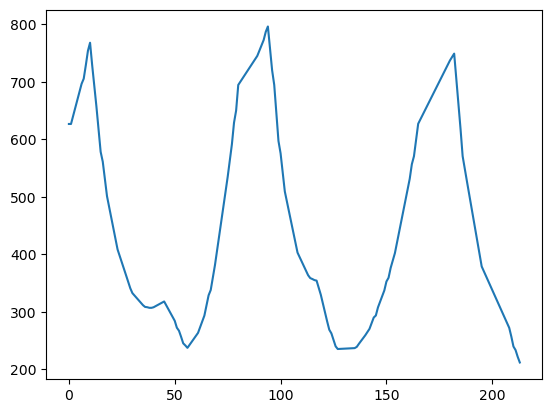

In [32]:
df_ball_positions['mid_y'].plot()
plt.show()

In [33]:
# handel outliers and smooth them 
df_ball_positions['mid_y_rolling_mean'] = df_ball_positions['mid_y'].rolling(window=5 , min_periods=1 , center=False).mean()



In [34]:
df_ball_positions.head()

,x1,y1,x2,y2,mid_y,mid_y_rolling_mean
0,892.924561,616.614746,911.267456,636.578369,626.596558,626.596558
1,892.924561,616.614746,911.267456,636.578369,626.596558,626.596558
2,878.685632,630.829834,896.575354,650.303015,640.566425,631.253180
3,864.446704,645.044922,881.883252,664.027661,654.536292,637.073958
4,850.207776,659.260010,867.191150,677.752307,668.506158,643.360398


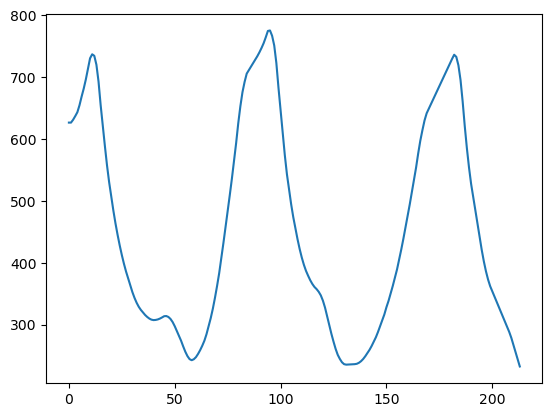

In [35]:
#plot mid_y_rolling_mean

df_ball_positions['mid_y_rolling_mean'].plot()
plt.show()

In [36]:
df_ball_positions['delta_y'] = df_ball_positions['mid_y_rolling_mean'].diff() #The delta_y values show how much the ball's vertical position has changed from one frame to the next.

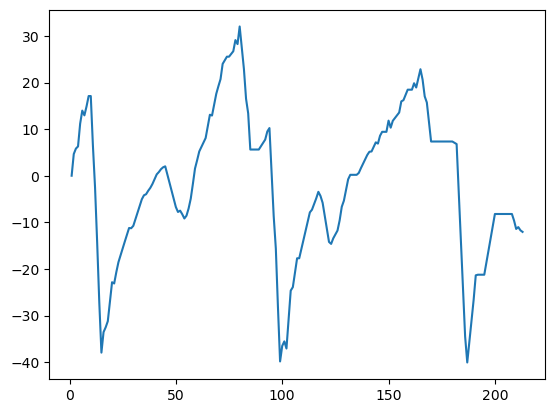

In [37]:
df_ball_positions['delta_y'].plot()
plt.show()
#Large changes in delta_y might indicate significant events, such as the ball being hit by a player, which often causes a noticeable change in the ball's movement.
#By analyzing the delta_y values, you can understand the ball’s movement pattern, such as when it accelerates, decelerates, or changes direction.

In [38]:
df_ball_positions.head()

,x1,y1,x2,y2,mid_y,mid_y_rolling_mean,delta_y
0,892.924561,616.614746,911.267456,636.578369,626.596558,626.596558,NaN
1,892.924561,616.614746,911.267456,636.578369,626.596558,626.596558,0.000000
2,878.685632,630.829834,896.575354,650.303015,640.566425,631.253180,4.656622
3,864.446704,645.044922,881.883252,664.027661,654.536292,637.073958,5.820778
4,850.207776,659.260010,867.191150,677.752307,668.506158,643.360398,6.286440


In [39]:
df_ball_positions['ball_hit']=0


In [40]:
df_ball_positions.head()

,x1,y1,x2,y2,mid_y,mid_y_rolling_mean,delta_y,ball_hit
0,892.924561,616.614746,911.267456,636.578369,626.596558,626.596558,NaN,0
1,892.924561,616.614746,911.267456,636.578369,626.596558,626.596558,0.000000,0
2,878.685632,630.829834,896.575354,650.303015,640.566425,631.253180,4.656622,0
3,864.446704,645.044922,881.883252,664.027661,654.536292,637.073958,5.820778,0
4,850.207776,659.260010,867.191150,677.752307,668.506158,643.360398,6.286440,0


In [41]:
len(df_ball_positions)

214

In [20]:
len(df_ball_positions)- int(25)*1.2

184.0

In [42]:
df_ball_positions['delta_y'].iloc[2]

4.656622314453102

In [43]:
minimum_change_frames_for_hit = 25  # Minimum number of frames required to confirm a hit.

# Loop through each frame, starting from the second frame to allow comparison with the previous frame.
for i in range(1, len(df_ball_positions) - int(minimum_change_frames_for_hit * 1.2)):
    # Check if the ball changes direction from going up to going down.
    negative_position_change = df_ball_positions['delta_y'].iloc[i] > 0 and df_ball_positions['delta_y'].iloc[i + 1] < 0
    
    # Check if the ball changes direction from going down to going up.
    positive_position_change = df_ball_positions['delta_y'].iloc[i] < 0 and df_ball_positions['delta_y'].iloc[i + 1] > 0

    # If there's a direction change, we suspect a hit might have occurred.
    if negative_position_change or positive_position_change:
        change_count = 0  # Initialize a counter to track consistent changes in the new direction.

        # Check the following frames to see if the direction change continues.
        for change_frame in range(i + 1, i + int(minimum_change_frames_for_hit * 1.2) + 1):
            # Check if the direction change from going up to going down continues.
            negative_position_change_following_frame = df_ball_positions['delta_y'].iloc[i] > 0 and df_ball_positions['delta_y'].iloc[change_frame] < 0
            
            # Check if the direction change from going down to going up continues.
            positive_position_change_following_frame = df_ball_positions['delta_y'].iloc[i] < 0 and df_ball_positions['delta_y'].iloc[change_frame] > 0

            # If the initial direction change continues, increase the change count.
            if negative_position_change and negative_position_change_following_frame:
                change_count += 1
            elif positive_position_change and positive_position_change_following_frame:
                change_count += 1

        # If the change continues for more than 25 frames, mark this frame as a hit.
        if change_count > minimum_change_frames_for_hit - 1:
            df_ball_positions['ball_hit'].iloc[i] = 1  # Mark the frame as a hit.


C:\Users\RTC\AppData\Local\Temp\ipykernel_29084\738478804.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ball_positions['ball_hit'].iloc[i] = 1
C:\Users\RTC\AppData\Local\Temp\ipykernel_29084\738478804.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ball_positions['ball_hit'].iloc[i] = 1
C:\Users\RTC\AppData\Local\Temp\ipykernel_29084\738478804.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ball_positions['bal

In [44]:
frame_nums_with_ball_hits = df_ball_positions[df_ball_positions['ball_hit']==1]


In [45]:
frame_nums_with_ball_hits.head()

,x1,y1,x2,y2,mid_y,mid_y_rolling_mean,delta_y,ball_hit
11,777.419495,718.279541,796.199524,739.225525,728.752533,736.978729,6.461328,1
58,925.267102,240.623273,938.669324,254.472354,247.547813,242.678014,-1.767201,1
95,624.477722,749.552856,641.159119,766.669556,758.111206,775.447021,0.774976,1
131,716.416107,228.967873,729.898834,242.837173,235.902523,235.514700,-0.770975,1
182,1295.951416,739.980835,1312.753906,757.997314,748.989075,736.235905,6.789639,1


In [ ]:
minimum_change_frames_for_hit = 25  # Minimum number of frames required to confirm a hit.

# Loop through each frame, starting from the second frame to allow comparison with the previous frame.
for i in range(1, len(df_ball_positions) - int(minimum_change_frames_for_hit * 1.2)):
    # Check if the ball changes direction from going up to going down.
    negative_position_change = df_ball_positions['delta_y'].iloc[i] > 0 and df_ball_positions['delta_y'].iloc[i + 1] < 0
    
    # Check if the ball changes direction from going down to going up.
    positive_position_change = df_ball_positions['delta_y'].iloc[i] < 0 and df_ball_positions['delta_y'].iloc[i + 1] > 0

    # If there's a direction change, we suspect a hit might have occurred.
    if negative_position_change or positive_position_change:
        change_count = 0  # Initialize a counter to track consistent changes in the new direction.

        # Check the following frames to see if the direction change continues.
        for change_frame in range(i + 1, i + int(minimum_change_frames_for_hit * 1.2) + 1):
            # Check if the direction change from going up to going down continues.
            negative_position_change_following_frame = df_ball_positions['delta_y'].iloc[i] > 0 and df_ball_positions['delta_y'].iloc[change_frame] < 0
            
            # Check if the direction change from going down to going up continues.
            positive_position_change_following_frame = df_ball_positions['delta_y'].iloc[i] < 0 and df_ball_positions['delta_y'].iloc[change_frame] > 0

            # If the initial direction change continues, increase the change count.
            if negative_position_change and negative_position_change_following_frame:
                change_count += 1
            elif positive_position_change and positive_position_change_following_frame:
                change_count += 1

        # If the change continues for more than 25 frames, mark this frame as a hit.
        if change_count > minimum_change_frames_for_hit - 1:
            df_ball_positions['ball_hit'].iloc[i] = 1  # Mark the frame as a hit.
